# Домашнее задание 5: бинарная линейная классификация

## Общая информация

Дата выдачи: 15.05.2023

Мягкий дедлайн: 23:59MSK 29.05.2023

Жесткий дедлайн: 23:59MSK 05.06.2023

## Оценивание и штрафы
 Оценивание находится в документе `hw-05-task.pdf`. Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через гугл форму. Посылка должна содержать:

Ноутбук hw-05-base-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке.

### О задании

В данной задаче будут использоваться данные кредитного скорринга. Файл : `scoring.xls` 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data_scor = pd.read_excel("scoring.xls")
data_scor.sample(3)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
342,0,0.10,2,0.06545,0,2,0,4,0.27,1,...,1,0,1,0,1,0,0,1,car_new,0
335,-1,0.24,2,0.11795,2,0,1,1,0.33,1,...,1,0,1,0,1,0,0,1,furniture,0
43,-1,0.12,2,0.08400,3,4,1,1,0.35,1,...,1,0,1,1,0,0,0,1,television,1


Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) и решать задачу кредитного скоринга.

Значения признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По строкам информация о клиентах. Целевая переменная — выдан кредит или нет.

In [3]:
X = data_scor.drop(columns=['target'])
y = data_scor['target']

In [4]:
print("Missing values in X and y: {}, {}".format(X.isnull().values.any(), y.isnull().values.any()))
print("Number of samples:", X.shape[0])
print("Class balance:", y.mean())

Missing values in X and y: False, False
Number of samples: 600
Class balance: 0.5


In [5]:
print(X.dtypes)

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
dtype: object


Part of men in dataset: 0.6916666666666667


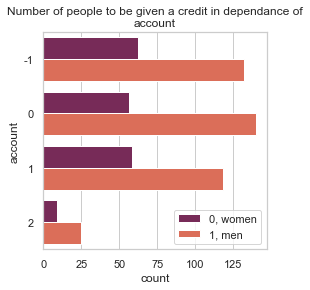

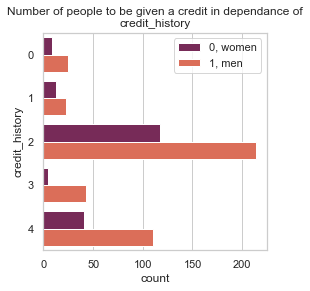

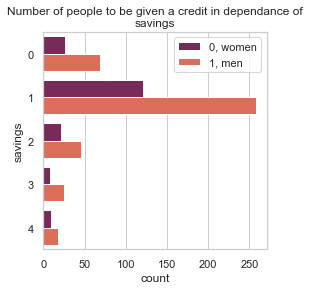

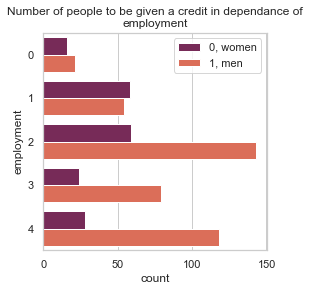

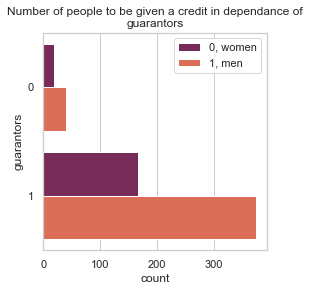

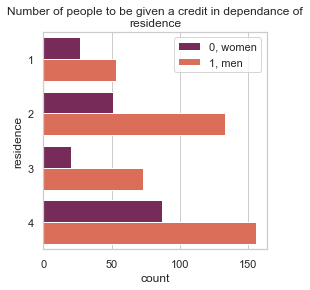

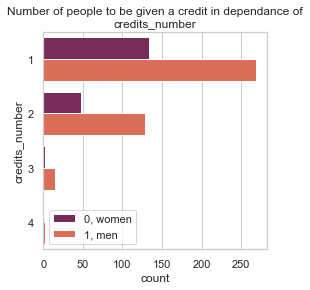

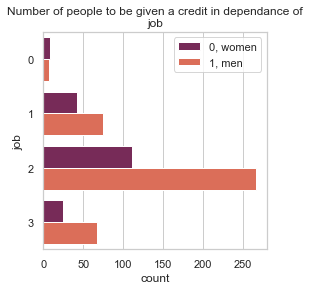

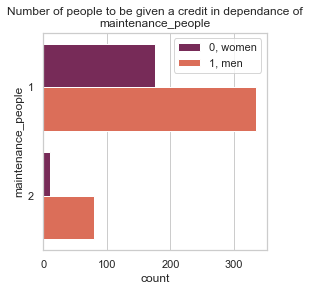

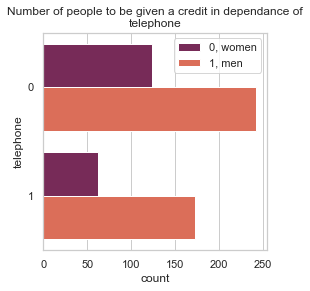

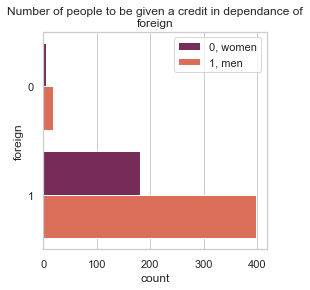

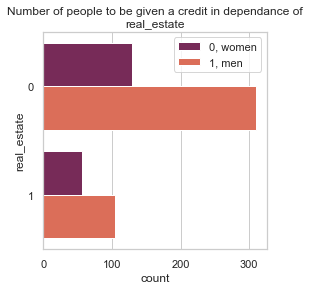

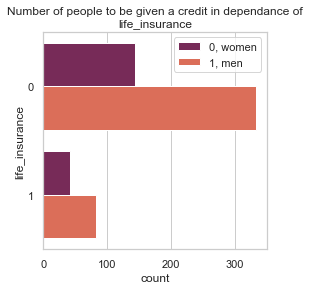

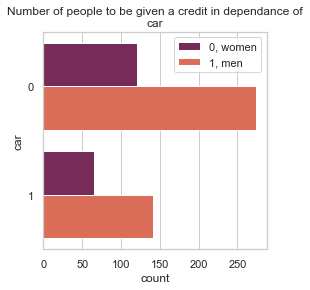

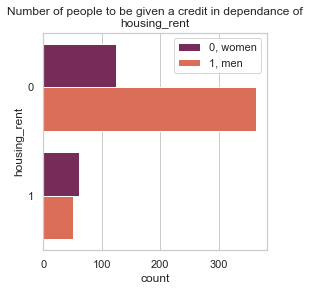

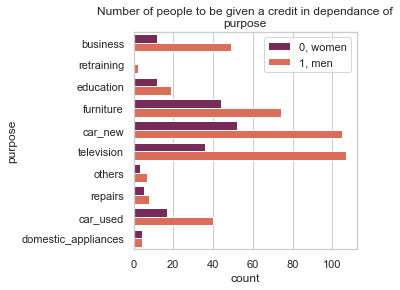

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

X_discrete = X.select_dtypes(['int64', 'object'])
print("Part of men in dataset:", X['sex'].mean())
for feature in X_discrete.drop(columns=['sex']):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.countplot(data=X, y=feature, hue='sex', orient='h', palette='rocket')
    ax.set_title("Number of people to be given a credit in dependance of\n{}".format(feature))
    plt.legend(labels=['0, women', '1, men'])

plt.show()

In [7]:
import numpy as np
from collections import Counter

for feature in X:
    if X[feature].dtype == "object":        
        value_nums = Counter(X[:][feature])
        value_nums_pos = Counter(X[y == 1][feature]) 
        ratio = {}
        for key, cur_v_n in value_nums.items():
            if key in value_nums_pos:
                cur_v_n_p = value_nums_pos[key]
            else:
                cur_v_n_p = 0
            ratio[key] = cur_v_n_p / cur_v_n
        X[feature] = X[feature].map(ratio)
X.head(5)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1,0.442623
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1,0.442623
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1,0.500000
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1,0.442623
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1,0.290323


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1000)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import datetime

In [10]:
from sklearn.linear_model import LogisticRegression

start_time = datetime.datetime.now()

lr = LogisticRegression(max_iter=100000, random_state=1313)
lr_pipeline = Pipeline([('scaling', StandardScaler()), ('lr', lr)])

best_lr = GridSearchCV(lr_pipeline, {'lr__C': np.logspace(-1.5, 0, num=25)},
                       scoring='roc_auc')
best_lr.fit(X_train, y_train)
lr_pred = best_lr.predict_proba(X_test)[:, 1]

print("Time elapsed:", datetime.datetime.now() - start_time)
print("Best parameters:", best_lr.best_params_)
print("LR AUC-ROC:", roc_auc_score(y_test, lr_pred))

Time elapsed: 0:00:02.580004
Best parameters: {'lr__C': 0.05623413251903491}
LR AUC-ROC: 0.7631158362865679


In [11]:
from sklearn.ensemble import RandomForestClassifier

start_time = datetime.datetime.now()

rf = RandomForestClassifier(random_state=1000)
rf_pipeline = Pipeline([('scaling', StandardScaler()), ('rf', rf)])

depth_vars = np.arange(1,6)
leaf_vars = np.arange(1,6)
best_rf = GridSearchCV(rf_pipeline, {
                          'rf__max_depth': depth_vars,
                          'rf__min_samples_leaf': leaf_vars
                       }, scoring='roc_auc')
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict_proba(X_test)[:, 1]

print("Time elapsed:", datetime.datetime.now() - start_time)
print("Best parameters:", best_rf.best_params_)
print("RF AUC-ROC:", roc_auc_score(y_test, rf_pred))

Time elapsed: 0:00:35.409004
Best parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 1}
RF AUC-ROC: 0.7977902855951636


Подбор параметров (25 значений) при кросс-валидации для моделей занял:
- `Logistic regression` - 1.136998 сек
- `Random Forest` - 18.872999 сек

Качество (AUC-ROC) для моделей было получено:
- `Logistic regression` - 0.7631158362865679
- `Random Forest` - 0.7977902855951636

**Вывод:** случайный лес работает в 18 раз медленнее и на 3,5% точнее, чем логистическая регрессия.

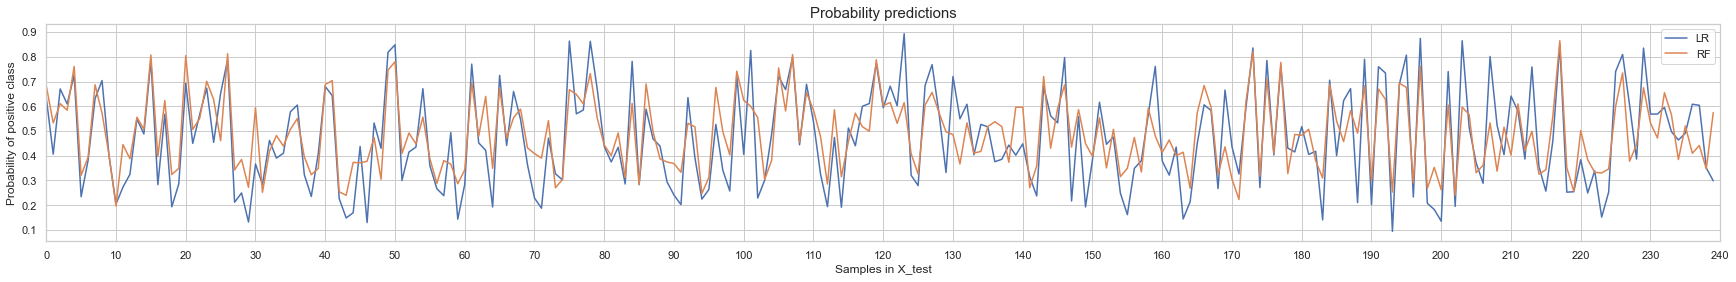

In [12]:
fig, ax = plt.subplots(figsize=(30, 4))
plt.plot(lr_pred, label="LR")
plt.plot(rf_pred, label="RF")

ax.set_xlim([0, X_test.shape[0]])
ax.set_xticks(np.arange(0, X_test.shape[0]+1, 10))

ax.set_title("Probability predictions", fontsize=15)
ax.set_xlabel("Samples in X_test")
ax.set_ylabel("Probability of positive class")

plt.legend()
plt.show()

Вероятности не выходят за пределы [0;1] и даже не достигают границ промежутка. Графики предсказаний двух классификаторов очень похожи, однако логистическая регрессия отличается более выявленными пиками максимумов и минимумов.

In [13]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for Logistic Regression:")
print(confusion_matrix(y_test, best_lr.predict(X_test)))

print("Confusion matrix for Random Forest:")
print(confusion_matrix(y_test, best_rf.predict(X_test)))

Confusion matrix for Logistic Regression:
[[89 28]
 [50 73]]
Confusion matrix for Random Forest:
[[91 26]
 [41 82]]


Оба классификатора различают одинаковое число положительных (`P`) и отрицательных (`N`) объектов - 117 и 123 соответственно. Вместе с тем, показатели `TP` и `TN` у случайного леса выше, т.е. работает он правильнее. Особенно это выражено на отрицательном классе, где разница составляет 9 объектов.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

def threshold_pr_range(clf_pred):
    threshold = 0
    for i in range(10):
        predicted = (clf_pred >= threshold).astype('int')

        print("    Threshold: {:0.1f}".format(threshold))
        print("    Precision: {:0.7f}".format(precision_score(y_test, predicted)))
        print("    Recall:    {:0.7f}".format(recall_score(y_test, predicted)))
        print("")

        threshold += 1/10

print("Logistic Regression:")
threshold_pr_range(lr_pred)
print("Random Forest:")
threshold_pr_range(rf_pred)

Logistic Regression:
    Threshold: 0.0
    Precision: 0.5125000
    Recall:    1.0000000

    Threshold: 0.1
    Precision: 0.5146444
    Recall:    1.0000000

    Threshold: 0.2
    Precision: 0.5429864
    Recall:    0.9756098

    Threshold: 0.3
    Precision: 0.6222222
    Recall:    0.9105691

    Threshold: 0.4
    Precision: 0.6712329
    Recall:    0.7967480

    Threshold: 0.5
    Precision: 0.7227723
    Recall:    0.5934959

    Threshold: 0.6
    Precision: 0.7857143
    Recall:    0.4471545

    Threshold: 0.7
    Precision: 0.8684211
    Recall:    0.2682927

    Threshold: 0.8
    Precision: 0.8571429
    Recall:    0.0975610

    Threshold: 0.9
    Precision: 0.0000000
    Recall:    0.0000000

Random Forest:
    Threshold: 0.0
    Precision: 0.5125000
    Recall:    1.0000000

    Threshold: 0.1
    Precision: 0.5125000
    Recall:    1.0000000

    Threshold: 0.2
    Precision: 0.5146444
    Recall:    1.0000000

    Threshold: 0.3
    Precision: 0.5525114
    Recall

Увеличение порога приводит к росту `precision` и снижению `recall`.

In [15]:
def threshold_prf1_range(clf_pred):
    threshold = 0
    steps = 10
    pres, recs, f1s = np.empty(steps), np.empty(steps), np.empty(steps)
    for i in range(steps):
        predicted = (clf_pred >= threshold).astype('int')

        pres[i] = precision_score(y_test, predicted)
        recs[i] = recall_score(y_test, predicted)
        f1s[i] = f1_score(y_test, predicted)

        threshold += 1/steps
    return pres, recs, f1s

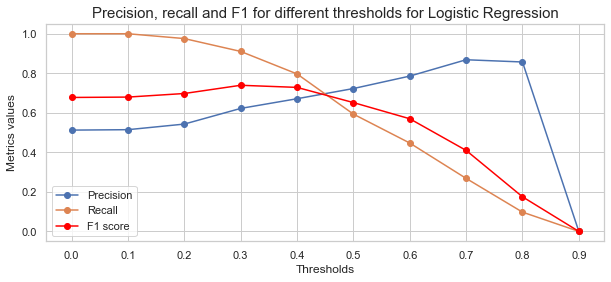

Maximum value of F1 is 0.7392739273927392
Threshold which maximizes F1 is 0.3


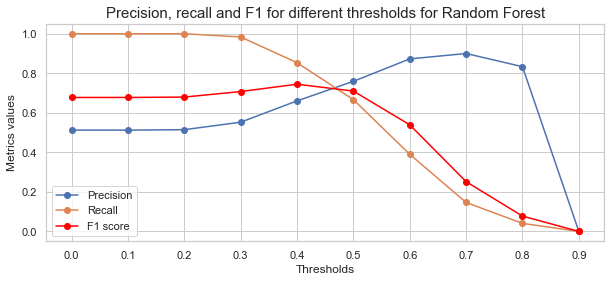

Maximum value of F1 is 0.7446808510638298
Threshold which maximizes F1 is 0.4


In [68]:
def prf1_plot(clf_pred, clf_name):
    fig, ax = plt.subplots(figsize=(10, 4))

    pres, recs, f1s = threshold_prf1_range(clf_pred)

    plt.plot(pres, marker = "o", label="Precision")
    plt.plot(recs, marker = "o", label="Recall")
    plt.plot(f1s, marker = "o", color="red", label="F1 score")

    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(np.arange(10)/10)

    ax.set_title("Precision, recall and F1 for different thresholds for {}".format(clf_name), 
                 fontsize=15)
    ax.set_xlabel("Thresholds")
    ax.set_ylabel("Metrics values")

    plt.legend()
    plt.show()

    print("Maximum value of F1 is", np.max(f1s))
    print("Threshold which maximizes F1 is", np.argmax(f1s)/10)

prf1_plot(lr_pred, "Logistic Regression")
prf1_plot(rf_pred, "Random Forest")

В то время как `Recall` монотонно спадает при повышении порога, `Precision` поднимаеся до максимума в значении порога 0.7 и опускается далее, спадая до 0 в 0.9. 

Наибольший `F1 score` достигается 
- `LR` при пороге 0.4 - это значение 0.7392739273927392,
- `RF` при пороге 0.4 - это значение 0.7446808510638298.

In [94]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=1000)
rf = RandomForestClassifier(random_state=1000)

for i in range(1, X.shape[1]//2 + 1):
    pca = PCA(n_components = i)
    X_reduced = pca.fit_transform(X)

    X_r_train, X_r_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=1000)

    lr_pipeline = Pipeline([('scaling', StandardScaler()), ('lr', lr)])
    rf_pipeline = Pipeline([('scaling', StandardScaler()), ('rf', rf)])

    print("Components in compression:", i)
    print("LR AUC-ROC: {:0.5f}".format(cross_val_score(lr_pipeline, X_reduced, y, scoring='roc_auc').mean()))
    print("RF AUC-ROC: {:0.5f}".format(cross_val_score(rf_pipeline, X_reduced, y, scoring='roc_auc').mean()))
    print("")

Components in compression: 1
LR AUC-ROC: 0.57817
RF AUC-ROC: 0.49675

Components in compression: 2
LR AUC-ROC: 0.65483
RF AUC-ROC: 0.61825

Components in compression: 3
LR AUC-ROC: 0.65783
RF AUC-ROC: 0.62050

Components in compression: 4
LR AUC-ROC: 0.66250
RF AUC-ROC: 0.64911

Components in compression: 5
LR AUC-ROC: 0.65944
RF AUC-ROC: 0.69281

Components in compression: 6
LR AUC-ROC: 0.67000
RF AUC-ROC: 0.69572

Components in compression: 7
LR AUC-ROC: 0.67122
RF AUC-ROC: 0.68761

Components in compression: 8
LR AUC-ROC: 0.67078
RF AUC-ROC: 0.68547

Components in compression: 9
LR AUC-ROC: 0.66550
RF AUC-ROC: 0.67781

Components in compression: 10
LR AUC-ROC: 0.67444
RF AUC-ROC: 0.68556



Лучший результат логистическая регрессия с параметрами по умолчанию показала при сжатии пространства признаков исходного датасета до размерности 10 (0.67444), случайный лес - 6 (0.69572). 

Монотонной динамики метрик не демонстрирует никакая из двух моделей. 

Закономерности по превосходству одной модели над другой по метрике `AUC-ROC` не выявлено: `LR` справлялась с задачей лучше `RF` ровно в половине случаев.

Все эти показатели существенно (на ~10%) меньше, чем показывали полученные ранее на исходном датасете результаты.

In [23]:
def new_clf_predict(clf, clf_name, threshold):
    clf_new_pipeline = Pipeline([('scaling', StandardScaler()), (clf_name, clf)])
    clf_new_pipeline.fit(X_train, y_train)
    clf_pred_p = clf_new_pipeline.predict_proba(X_test)
    clf_pred = (clf_pred_p >= threshold).astype('int')

    return clf_new_pipeline, clf_pred

In [24]:
lr_new = LogisticRegression(C=best_lr.best_params_['lr__C'], 
                            random_state=1000)
rf_new = RandomForestClassifier(max_depth=best_rf.best_params_['rf__max_depth'],
                                min_samples_leaf=best_rf.best_params_['rf__min_samples_leaf'], 
                                random_state=1000)

lr_new_pipeline, lr_new_pred = new_clf_predict(lr_new, 'lr', 0.3)
rf_new_pipeline, rf_new_pred = new_clf_predict(rf_new, 'rf', 0.4) 

In [89]:
def plot_feature_importances(features, importances, clf_name, imp_metr=''):
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.barh(features, importances, color=sns.color_palette('flare', len(features)))
    ax.set_title("Importance of features in X for {}".format(clf_name), fontsize=15)
    ax.set_xlabel("Importance ({})".format(imp_metr))
    ax.set_ylabel("Feature names")
    plt.show()

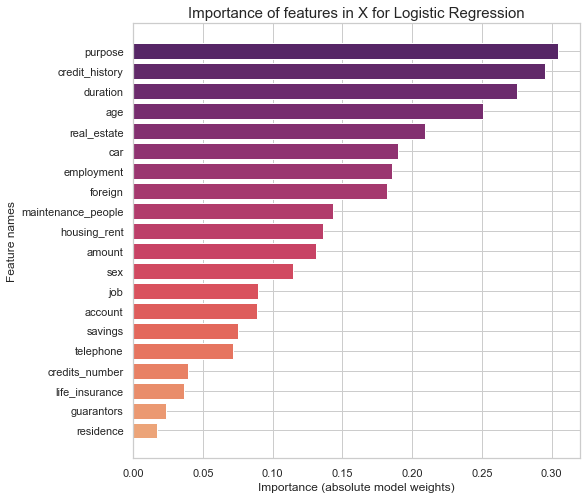

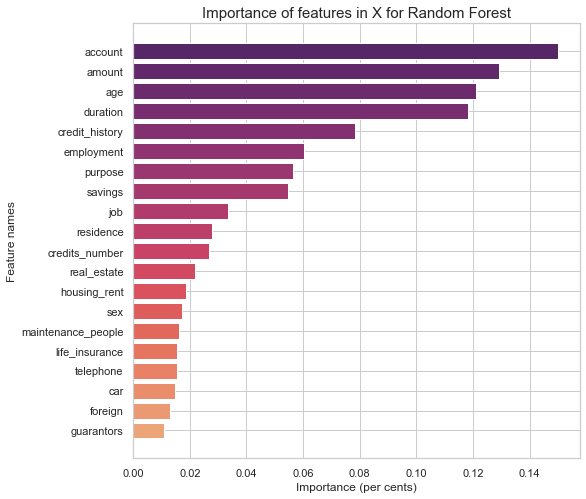

In [90]:
lr_features_fi, lr_importances_fi = zip(*sorted(list(zip(X_train.columns, abs(lr_new_pipeline._final_estimator.coef_[0]))), 
                                        key=lambda x: x[1]))
plot_feature_importances(lr_features_fi, lr_importances_fi, "Logistic Regression", "absolute model weights")

rf_features_fi, rf_importances_fi = zip(*sorted(list(zip(X_train.columns, rf_new_pipeline._final_estimator.feature_importances_)), 
                                        key=lambda x: x[1]))
plot_feature_importances(rf_features_fi, rf_importances_fi, "Random Forest", "per cents")

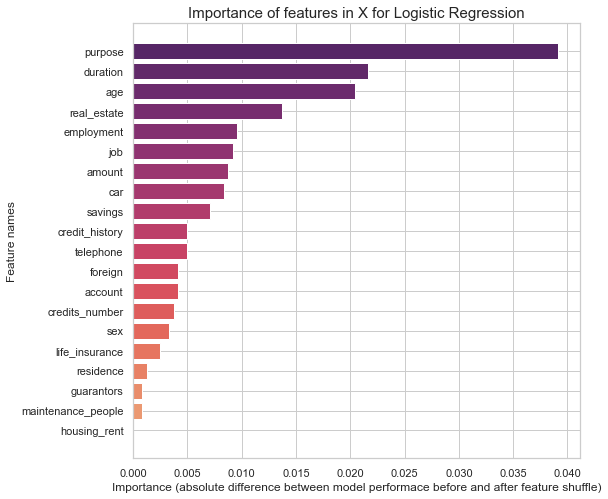

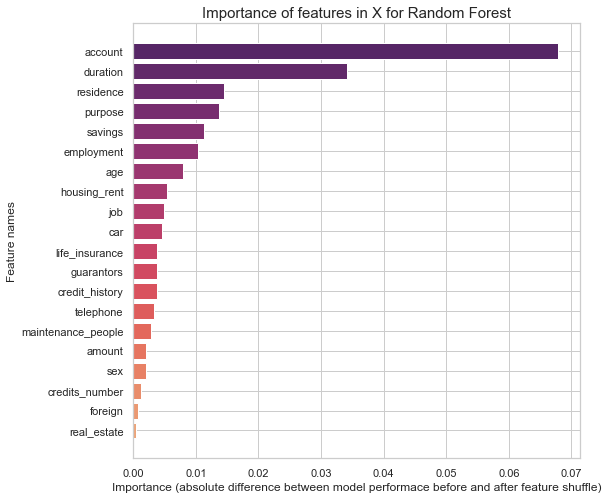

In [101]:
from sklearn.inspection import permutation_importance

lr_perm_importances = permutation_importance(lr_new_pipeline, X_test, y_test,
                                             n_repeats=10,
                                             random_state=1000)
lr_features_pi, lr_importances_pi = zip(*sorted(list(zip(X_train.columns, abs(lr_perm_importances.importances_mean))), 
                                        key=lambda x: x[1]))
plot_feature_importances(lr_features_pi, lr_importances_pi, "Logistic Regression", 
                         "absolute difference between model performace before and after feature shuffle")

rf_perm_importances = permutation_importance(rf_new_pipeline, X_test, y_test,
                                             n_repeats=10,
                                             random_state=1000)
rf_features_pi, rf_importances_pi = zip(*sorted(list(zip(X_train.columns, abs(rf_perm_importances.importances_mean))), 
                                        key=lambda x: x[1]))
plot_feature_importances(rf_features_pi, rf_importances_pi, "Random Forest", 
                         "absolute difference between model performace before and after feature shuffle")

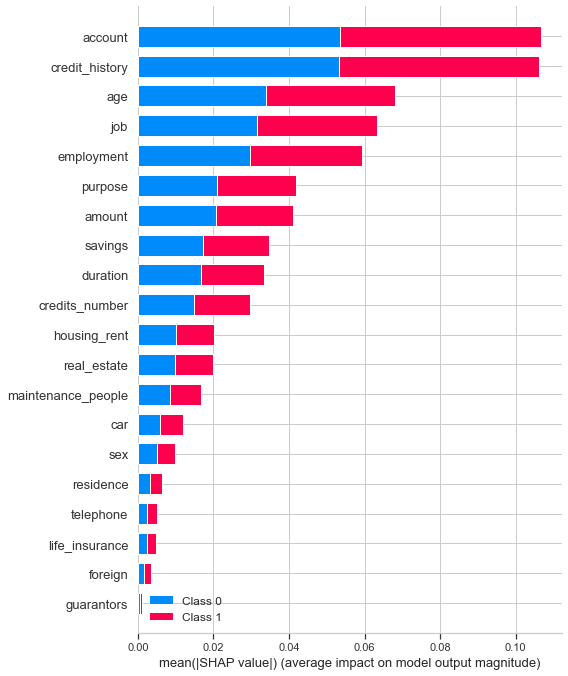

In [100]:
import shap

shap_rf = shap.TreeExplainer(rf_new_pipeline._final_estimator).shap_values(X_test)
shap.summary_plot(shap_rf, X_test, auto_size_plot=True)

Для сравнения оценки важности признаков моделей были использованы методы:

- для логистической регрессии
    - сравнение абсолютных значений весов 
    - `permutation_importance`
- для случайного леса
    - `feature_importance_` 
    - `permutation_importance` 
    - `SHAP`

В случае логистической регрессии оценки важности признаков двумя методами разнятся, но с точностью до отношения "лежит выше/ниже середины в упорядоченном списке `features` (скорее важны/не важны)" практически идентичны.

В случае случайного леса оценки важности тремя методами различаются, причем некоторые признаки оказываются отнесены разными методами к разным степеням важности (например, признак `amount`, классифицируемый `feature_importance_` как второй по важности признак, оказывается 5 с конца по важности с точки зрения `permutation_importance`).

Вместе с тем, в определении наиболее важного для каждой модели признака все соответствующие методы солидарны:
- `purpose` для `Logistic Regression`,
- `account` для `Random Forest`.